In [1]:
import os
import matplotlib.pyplot as plt 
import numpy as np
import cv2
import tensorflow as tf
from keras.utils.np_utils import to_categorical
import random,shutil
from keras.models import Sequential
from keras.layers import Dropout,Conv2D,Flatten,Dense, MaxPooling2D, BatchNormalization
from keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

Using TensorFlow backend.


In [2]:
img1 = image.load_img ("C:/Users/Krittika Chaturvedi/Desktop/DDD/DDD_dataset/train/Drowsy/_2.jpg",grayscale = False)
img2 = image.load_img("C:/Users/Krittika Chaturvedi/Desktop/DDD/DDD_dataset/train/Not_Drowsy/_5.jpg",grayscale = False)

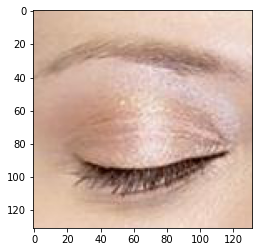

In [3]:
plt.imshow(img1)

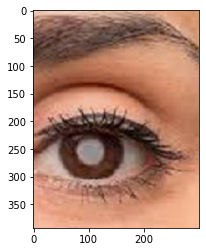

In [4]:
plt.imshow(img2)

In [5]:
cv2.imread("C:/Users/Krittika Chaturvedi/Desktop/DDD/DDD_dataset/train/Drowsy/_2.jpg").shape

(131, 132, 3)

In [6]:
cv2.imread("C:/Users/Krittika Chaturvedi/Desktop/DDD/DDD_dataset/train/Not_Drowsy/_5.jpg").shape

(393, 300, 3)

In [7]:
train = ImageDataGenerator(rescale = 1/255)
validation = ImageDataGenerator(rescale = 1/255)

In [8]:
train_dataset = train.flow_from_directory("C:/Users/Krittika Chaturvedi/Desktop/DDD/DDD_dataset/train",
                                         target_size = (24,24),
                                         batch_size = 1,
                                         color_mode='grayscale',
                                         class_mode = 'binary')
validation_dataset = validation.flow_from_directory("C:/Users/Krittika Chaturvedi/Desktop/DDD/DDD_dataset/test",
                                         target_size = (24,24),
                                         batch_size = 1,
                                         color_mode='grayscale',
                                         class_mode = 'binary')

Found 1270 images belonging to 2 classes.
Found 242 images belonging to 2 classes.


In [9]:
train_dataset.class_indices

{'Drowsy': 0, 'Not_Drowsy': 1}

In [10]:
train_dataset.classes

array([0, 0, 0, ..., 1, 1, 1])

In [11]:
model = Sequential([
    Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=(24,24,1)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(32,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dense(1, activation='softmax')

])

In [12]:
model.compile(optimizer='adam',
               loss='binary_crossentropy',
               metrics=['accuracy'])

In [13]:
history = model.fit(train_dataset, 
          epochs = 32,
          steps_per_epoch = 32,
          validation_data = validation_dataset,
         shuffle=True)

Epoch 1/32
32/32 [==============================] - 9s 295ms/step - loss: 5.7500 - accuracy: 0.6250 - val_loss: 15.2492 - val_accuracy: 0.4504
Epoch 2/32
32/32 [==============================] - 1s 45ms/step - loss: 8.6249 - accuracy: 0.4375 - val_loss: 15.2492 - val_accuracy: 0.4504
Epoch 3/32
32/32 [==============================] - 2s 65ms/step - loss: 10.5416 - accuracy: 0.3125 - val_loss: 0.0000e+00 - val_accuracy: 0.4504
Epoch 4/32
32/32 [==============================] - 2s 75ms/step - loss: 7.1875 - accuracy: 0.5312 - val_loss: 15.2492 - val_accuracy: 0.4504
Epoch 5/32
32/32 [==============================] - 3s 85ms/step - loss: 5.7500 - accuracy: 0.6250 - val_loss: 0.0000e+00 - val_accuracy: 0.4504
Epoch 6/32
32/32 [==============================] - 4s 113ms/step - loss: 8.6249 - accuracy: 0.4375 - val_loss: 0.0000e+00 - val_accuracy: 0.4504
Epoch 7/32
32/32 [==============================] - 2s 68ms/step - loss: 7.1875 - accuracy: 0.5312 - val_loss: 15.2492 - val_accuracy: 0

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 22, 22, 16)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 9, 32)          4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 2, 2, 64)          18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 1, 1, 64)         

In [15]:
model.save(r'C:/Users/Krittika Chaturvedi/Desktop/DDD/model/cnn.h5')

In [16]:
!pip install pygame
!pip install playsound
from playsound import playsound

In [ ]:
face = cv2.CascadeClassifier('C:/Users/Krittika Chaturvedi/Desktop/DDD/haar cascade files/haarcascade_frontalface_alt.xml')
leye = cv2.CascadeClassifier('C:/Users/Krittika Chaturvedi/Desktop/DDD/haar cascade files/haarcascade_lefteye_2splits.xml')
reye = cv2.CascadeClassifier('C:/Users/Krittika Chaturvedi/Desktop/DDD/haar cascade files/haarcascade_righteye_2splits.xml')

lbl=['Close','Open']

model = load_model('model/cnn.h5')
path = os.getcwd()
cap = cv2.VideoCapture(0)
font = cv2.FONT_HERSHEY_COMPLEX_SMALL
count=0
score=0
thicc=2
rpred=[99]
lpred=[99]

while(True):
    ret, frame = cap.read()
    height,width = frame.shape[:2] 

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    plt.imshow(gray)
    
    faces = face.detectMultiScale(gray,minNeighbors=5,scaleFactor=1.1,minSize=(25,25))
    left_eye = leye.detectMultiScale(gray)
    right_eye =  reye.detectMultiScale(gray)

    cv2.rectangle(frame, (0,height-50) , (200,height) , (0,0,0) , thickness=cv2.FILLED)

    for (x,y,w,h) in faces:
        cv2.rectangle(frame, (x,y) , (x+w,y+h) , (100,100,100) , 1 )

    for (x,y,w,h) in right_eye:
        r_eye = frame[y:y+h,x:x+w]
        count = count+1
        r_eye = cv2.cvtColor(r_eye,cv2.COLOR_BGR2GRAY)
        r_eye = cv2.resize(r_eye,(24,24))
        r_eye = r_eye/255
        r_eye =  r_eye.reshape(24,24,-1)
        r_eye = np.expand_dims(r_eye,axis=0)
        rpred = model.predict_classes(r_eye)
        if(rpred[0]==1):
            lbl='Open' 
        if(rpred[0]==0):
            lbl='Closed'
        break

    for (x,y,w,h) in left_eye:
        l_eye = frame[y:y+h,x:x+w]
        count = count+1
        l_eye = cv2.cvtColor(l_eye,cv2.COLOR_BGR2GRAY)  
        l_eye = cv2.resize(l_eye,(24,24))
        l_eye = l_eye/255
        l_eye = l_eye.reshape(24,24,-1)
        l_eye = np.expand_dims(l_eye,axis=0)
        lpred = model.predict_classes(l_eye)
        if(lpred[0]==1):
            lbl='Open'   
        if(lpred[0]==0):
            lbl='Closed'
        break

    if(rpred[0] == 0 and lpred[0] == 0):
        score = score + 1
        cv2.putText(frame,"Closed",(10,height-20), font, 1,(255,255,255),1,cv2.LINE_AA)
    # if(rpred[0]==1 or lpred[0]==1):
    else:
        score = score + 1
        cv2.putText(frame,"Closed",(10,height-20), font, 1,(255,255,255),1,cv2.LINE_AA)
    
        
    if(score < 0):
        score = 0   
    cv2.putText(frame,'Score:'+str(score),(100,height-20), font, 1,(255,255,255),1,cv2.LINE_AA)
    if(score > 15):
        #person is feeling sleepy so we beep the alarm
        cv2.imwrite(os.path.join('C:/Users/Krittika Chaturvedi/Desktop/DDD/Output','image.jpg'),frame)
        try:
            playsound('alarm.mp3')
            
        except:  # isplaying = False
            pass
        if(thicc<16):
            thicc = thicc + 2
        else:
            thicc = thicc - 2
            if(thicc < 2):
                thicc = 2
        cv2.rectangle(frame,(0,0),(width,height),(0,0,255),thicc) 
    cv2.imshow('frame',frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [ ]:
plt.imshow(gray)